<a href="https://colab.research.google.com/github/Ashwin1234/ML_OCR_project1/blob/main/HandWritten_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model
from google.colab.patches import cv2_imshow
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from gensim.models import Word2Vec

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [ ]:
#!unzip test_images.zip -d test_images

In [6]:
!unzip data_1.zip -d data_1

Archive:  data_1.zip
   creating: data_1/data/
   creating: data_1/data/images/
  inflating: data_1/data/images/TRAIN_00001.jpg  
  inflating: data_1/data/images/TRAIN_00002.jpg  
  inflating: data_1/data/images/TRAIN_00003.jpg  
  inflating: data_1/data/images/TRAIN_00004.jpg  
  inflating: data_1/data/images/TRAIN_00005.jpg  
  inflating: data_1/data/images/TRAIN_00006.jpg  
  inflating: data_1/data/images/TRAIN_00007.jpg  
  inflating: data_1/data/images/TRAIN_00008.jpg  
  inflating: data_1/data/images/TRAIN_00009.jpg  
  inflating: data_1/data/images/TRAIN_00010.jpg  
  inflating: data_1/data/images/TRAIN_00011.jpg  
  inflating: data_1/data/images/TRAIN_00012.jpg  
  inflating: data_1/data/images/TRAIN_00013.jpg  
  inflating: data_1/data/images/TRAIN_00014.jpg  
  inflating: data_1/data/images/TRAIN_00015.jpg  
  inflating: data_1/data/images/TRAIN_00016.jpg  
  inflating: data_1/data/images/TRAIN_00017.jpg  
  inflating: data_1/data/images/TRAIN_00018.jpg  
  inflating: data_1/

In [7]:
test_image_dir = '/content/data_1/data/images'
img_size=32
train_images=[]
for j in os.listdir(test_image_dir):
  train_images.append(os.path.join(test_image_dir,j))
len(train_images)

1000

In [8]:
test_dir = '/content/data_1/data'
df=pd.read_excel(os.path.join(test_dir,'names.xlsx'))
first_row=df.columns.values
first_df=pd.DataFrame({'images':[first_row[0]],'labels':[first_row[1]]})
df.columns=['images','labels']
df=pd.concat([first_df,df],axis=0)
df.head()

,images,labels
0,TRAIN_00001.jpg,BALTHAZAR
0,TRAIN_00002.jpg,SIMON
1,TRAIN_00003.jpg,BENES
2,TRAIN_00004.jpg,LA LOVE
3,TRAIN_00005.jpg,DAPHNE


In [9]:
train_labels=df['labels']

In [10]:
train_X = []
train_Y = []
for image in train_images:
  train_X.append(image)
for label in train_labels:
  train_Y.append(label)

'TRAIN_00001.jpg'

In [11]:
!unzip NN_data.zip -d NN_data

Streaming output truncated to the last 5000 lines.
 extracting: NN_data/NN_data/Valid/F/184.jpg  
 extracting: NN_data/NN_data/Valid/F/185.jpg  
 extracting: NN_data/NN_data/Valid/F/186.jpg  
 extracting: NN_data/NN_data/Valid/F/187.jpg  
 extracting: NN_data/NN_data/Valid/F/188.jpg  
 extracting: NN_data/NN_data/Valid/F/189.jpg  
 extracting: NN_data/NN_data/Valid/F/19.jpg  
 extracting: NN_data/NN_data/Valid/F/190.jpg  
 extracting: NN_data/NN_data/Valid/F/191.jpg  
 extracting: NN_data/NN_data/Valid/F/192.jpg  
 extracting: NN_data/NN_data/Valid/F/193.jpg  
 extracting: NN_data/NN_data/Valid/F/194.jpg  
 extracting: NN_data/NN_data/Valid/F/195.jpg  
  inflating: NN_data/NN_data/Valid/F/2.jpg  
 extracting: NN_data/NN_data/Valid/F/20.jpg  
 extracting: NN_data/NN_data/Valid/F/21.jpg  
 extracting: NN_data/NN_data/Valid/F/22.jpg  
 extracting: NN_data/NN_data/Valid/F/23.jpg  
 extracting: NN_data/NN_data/Valid/F/24.jpg  
 extracting: NN_data/NN_data/Valid/F/25.jpg  
 extracting: NN_da

In [27]:
dir = '/content/NN_data/NN_data/Train'
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [28]:
val_dir = "/content/NN_data/NN_data/Valid"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [29]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [30]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [31]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y=LB.fit_transform(val_Y)

In [32]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [33]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [34]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

(33386, 32, 32, 1)
(33386, 35)
(8172, 32, 32, 1)
(8172, 35)


In [35]:
train_Y.shape

(33386, 35)

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [37]:


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [38]:


model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])



In [39]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
1044/1044 [==============================] - 79s 75ms/step - loss: 1.6406 - accuracy: 0.5396 - val_loss: 1.1438 - val_accuracy: 0.7412
Epoch 2/10
1044/1044 [==============================] - 76s 73ms/step - loss: 0.4190 - accuracy: 0.8635 - val_loss: 1.1029 - val_accuracy: 0.7664
Epoch 3/10
1044/1044 [==============================] - 77s 74ms/step - loss: 0.3244 - accuracy: 0.8955 - val_loss: 1.1367 - val_accuracy: 0.7830
Epoch 4/10
1044/1044 [==============================] - 77s 74ms/step - loss: 0.2772 - accuracy: 0.9066 - val_loss: 1.1502 - val_accuracy: 0.7761
Epoch 5/10
1044/1044 [==============================] - 77s 74ms/step - loss: 0.2532 - accuracy: 0.9140 - val_loss: 1.2765 - val_accuracy: 0.7803
Epoch 6/10
1044/1044 [==============================] - 76s 72ms/step - loss: 0.2202 - accuracy: 0.9217 - val_loss: 1.1710 - val_accuracy: 0.7919
Epoch 7/10
1044/1044 [==============================] - 75s 72ms/step - loss: 0.2135 - accuracy: 0.9253 - val_loss: 1.3016 -

In [40]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()     

In [41]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1iiwtbyLrC_3RHKySJH4lB6bdolpY4cXB'})

In [ ]:
file_obj = drive.CreateFile({'id': '1m_6KvvD1OUb30EF8muOo2AV-3Ub0oSJF'})                       
file_obj.GetContentFile('model.h5')
model=load_model('model.h5')

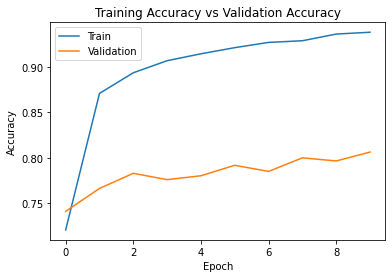

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

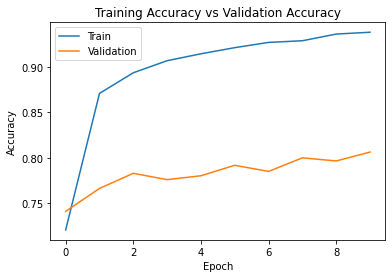

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [108]:
def get_letters(img):
    letters = []
    
    image = cv2.imread(img)
    cv2_imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
        if type(x)==np.str_ or type(y)==np.str_ or type(w)==np.str_ or type(h)==np.str_:
            continue
       
        roi = gray[y:y + h, x:x + w]
        #cv2_imshow(roi)

        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
      
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    cv2_imshow(image)
    return letters, image


In [46]:
def get_word(letters):
  return ' '.join(map(str,letters))


In [47]:
|dir = '/content/test_images/test_images'
test_images=[]
for j in os.listdir(dir):
  test_images.append(os.path.join(dir,j))

SyntaxError: ignored

In [103]:
def word2vec(word):
    from collections import Counter
    from math import sqrt

    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

In [115]:
#print(os.path.join(test_image_dir,df.iloc[0]['images']))
#get_letters(os.path.join(test_image_dir,df.iloc[0]['images']))

letters,image=get_letters(os.path.join(test_image_dir,df.iloc[6]['images']))
word=get_word(letters)
print("word is ",word)
print("accuracy of word mathcing is " ,cosdis(word2vec(word),word2vec(df.iloc[6]['labels']))*100, "%")
#print(letters)

word is  M C N Q 5 I 5 I M
accuracy of word mathcing is  19.888932104393252 %


In [116]:
letters,image=get_letters(os.path.join(test_image_dir,df.iloc[5]['images']))
word=get_word(letters)
print("word is ",word)
print("accuracy of word mathcing is " ,cosdis(word2vec(word),word2vec(df.iloc[5]['labels']))*100, "%")
#print(letters)

word is  L U C 1 L
accuracy of word mathcing is  37.30019232961255 %
